In [1]:
import tensorflow as tf
from mnist import MNIST
import numpy as np
import pandas as pd
import keras
import time
import sklearn
import scikitplot as skplt
from sklearn.metrics import classification_report
from sklearn import svm, datasets
from tensorflow import Print
from tensorflow.metrics import recall 
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

Using TensorFlow backend.


###### Importing data

In [2]:
mndata = MNIST('C:\\University\\Machine learning\\Ass_2\\Sample Data')
images, labels = mndata.load_training()
test_images, test_labels = mndata.load_testing()

In [3]:
images = np.asarray(images)
test_images = np.asarray(test_images)

###### Data Preprocessing

In [4]:
images = images.astype('float64')
test_images = test_images.astype('float64')
images = images/255
test_images = test_images/255

In [5]:
def Validation_dataset(X,Y, percent):
    X=np.transpose(X)
    Y=np.transpose(Y)
    k=int((percent/100)*X.shape[1])
    rand= np.random.permutation(X.shape[1])
    rand= rand[0:k]
    All_index=np.arange(X.shape[1])
    a=set(rand)
    b=set(All_index)
    c=b-a
    a=sorted(a)
    c=sorted(c)

    Train_Data_mat=np.zeros((X.shape[0],len(c)))
    Train_labels= np.zeros((len(c)))
    Val_Data_mat=np.zeros((X.shape[0], len(a)))
    Val_labels= np.zeros((len(a)))
    for i in range(len(c)):
        Train_Data_mat[:,i]=X[:,c[i]]
        Train_labels[i]= Y[c[i]]
    for i in range(len(a)):
        Val_Data_mat[:,i]=X[:,a[i]]
        Val_labels[i]= Y[a[i]] 
      
    return np.transpose(Train_Data_mat), np.transpose(Train_labels), np.transpose(Val_Data_mat), np.transpose(Val_labels)

###### Birfurcation of data into training and validation set

In [6]:
x_train_data, x_train_label, y_train_data, y_train_label = Validation_dataset(images, labels, 20)

In [7]:
x_train_label = keras.utils.to_categorical(x_train_label, 10)
y_train_label = keras.utils.to_categorical(y_train_label, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

###### Parameter

In [8]:
n_input = 784
n_hidden = 256
n_hidden1 = 256
n_output = 10
lr = 0.01
epochs = 50
display_step = 1

###### Placeholder

In [9]:
X = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32, [None, n_output])

###### Weights

In [10]:
W1 = tf.Variable(tf.random_uniform([n_input, n_hidden], -1.0, 1.0))
W2 = tf.Variable(tf.random_uniform([n_hidden, n_hidden1], -1.0, 1.0))
W3 = tf.Variable(tf.random_uniform([n_hidden1, n_output], -1.0, 1.0))

###### Bias

In [11]:
b1 = tf.Variable(tf.random_uniform([n_hidden]))
b2 = tf.Variable(tf.random_uniform([n_hidden1]))
b3 = tf.Variable(tf.random_uniform([n_output]))

In [12]:
def mlp(x):
    L1 = tf.sigmoid(tf.matmul(X, W1) + b1)
    L2 = tf.sigmoid(tf.matmul(L1, W2) + b2)
    hy = tf.sigmoid(tf.matmul(L2, W3) + b3)
    return hy

In [13]:
logits = mlp(X)

###### loss and optimisation

In [14]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(lr).minimize(cost)
init = tf.global_variables_initializer()


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



###### Creating Predicting Labels

###### Evaluating accuracy of Training, Validation and Test data

In [15]:
with tf.Session() as sess:
    start_time = time.time()
    sess.run(init)
    print (x_train_data.shape, x_train_label.shape)
    for step in range(epochs):
        _, c = sess.run([optimizer, cost], feed_dict = {X: x_train_data, Y: x_train_label})
        if step % display_step == 0:
            print("Cost: ", c)
       
    prediction = tf.equal(tf.argmax(tf.nn.softmax(logits),1), tf.argmax(Y,1))
    accuracy = tf.reduce_mean(tf.cast(prediction, "float"))
 
    mlp = MLPClassifier()
    mlp.fit(x_train_data,x_train_label)
    pred_label = mlp.predict(test_images)
    pred_proba = mlp.predict_proba(test_images)
    print("Training set Accuracy:", (accuracy.eval({X:x_train_data, Y:x_train_label}))*100)
    print("Validation set Accuracy:", (accuracy.eval({X:y_train_data, Y:y_train_label}))*100)
    print("Test set Accuracy:", (accuracy.eval({X:test_images, Y:test_labels}))*100)
    print("Running time: "+str(int(time.time()-start_time))+" seconds")

(48000, 784) (48000, 10)
Cost:  2.3940585
Cost:  2.2900546
Cost:  2.175869
Cost:  2.0198467
Cost:  1.9270992
Cost:  1.8550959
Cost:  1.8100405
Cost:  1.7770907
Cost:  1.7629491
Cost:  1.7562635
Cost:  1.7471709
Cost:  1.7356243
Cost:  1.7124603
Cost:  1.6968558
Cost:  1.6887639
Cost:  1.6726224
Cost:  1.662038
Cost:  1.6592329
Cost:  1.6546546
Cost:  1.6478863
Cost:  1.6414995
Cost:  1.6364505
Cost:  1.633234
Cost:  1.6306905
Cost:  1.6278523
Cost:  1.6249982
Cost:  1.6222578
Cost:  1.6194043
Cost:  1.6166463
Cost:  1.6141171
Cost:  1.6118804
Cost:  1.6100024
Cost:  1.6081328
Cost:  1.6060231
Cost:  1.6039588
Cost:  1.6021324
Cost:  1.6005769
Cost:  1.5991651
Cost:  1.5976787
Cost:  1.5963098
Cost:  1.5950764
Cost:  1.5937991
Cost:  1.5925013
Cost:  1.5911931
Cost:  1.5899886
Cost:  1.5888457
Cost:  1.5876313
Cost:  1.5864252
Cost:  1.5851586
Cost:  1.5840307


c:\users\hitesh\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set Accuracy: 79.91250157356262
Validation set Accuracy: 79.3916642665863
Test set Accuracy: 78.2800018787384
Running time: 1004 seconds


In [52]:
pred_labels1=list()
pred_labels1.append(np.argmax(pred_label, axis=1))
test_labels1=list()
test_labels1.append(np.argmax(test_labels, axis=1))
pred_labels1 = np.concatenate(pred_labels1, axis=0)
test_labels1 = np.concatenate(test_labels1, axis=0)

###### Creating Confusion Matrix

[[899   1  13  20   2   2  58   0   5   0]
 [ 20 960   0  13   4   0   3   0   0   0]
 [113   1 758   8  78   1  40   0   1   0]
 [ 76   5  11 872  24   0  11   0   1   0]
 [ 55   1  64  35 810   1  33   0   1   0]
 [ 28   0   0   1   0 950   0  10   2   9]
 [218   1  65  23  73   0 612   0   8   0]
 [ 21   0   0   0   0  16   0 940   0  23]
 [ 21   1   8   4   7   5   9   6 939   0]
 [ 22   0   0   1   0   9   1  41   0 926]]


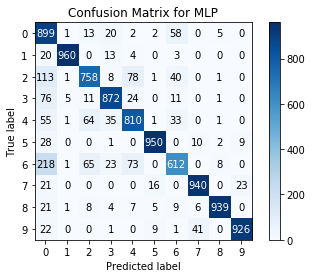

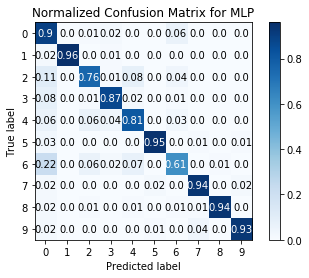

In [58]:
# confusion matrix
con = tf.confusion_matrix(test_labels1, pred_labels1)

sess = tf.Session()
with sess.as_default():
        print(sess.run(con))

skplt.metrics.plot_confusion_matrix(test_labels1, pred_labels1, title='Confusion Matrix for MLP')
plt.show()

# normalized confusion matrix
skplt.metrics.plot_confusion_matrix(test_labels1, pred_labels1, title='Normalized Confusion Matrix for MLP', normalize=True)
plt.show()

###### Evaluating precision, recall and F-measure

In [54]:
print(classification_report(test_labels1, pred_labels1))

              precision    recall  f1-score   support

           0       0.61      0.90      0.73      1000
           1       0.99      0.96      0.97      1000
           2       0.82      0.76      0.79      1000
           3       0.89      0.87      0.88      1000
           4       0.81      0.81      0.81      1000
           5       0.97      0.95      0.96      1000
           6       0.80      0.61      0.69      1000
           7       0.94      0.94      0.94      1000
           8       0.98      0.94      0.96      1000
           9       0.97      0.93      0.95      1000

   micro avg       0.87      0.87      0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



###### Plotting ROC curve

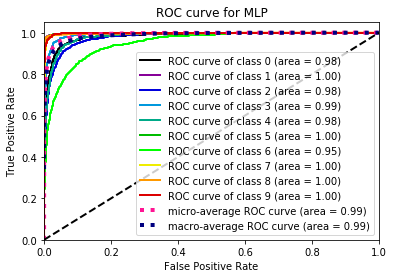

In [59]:
skplt.metrics.plot_roc(test_labels1, pred_proba, title = 'ROC curve for MLP')
plt.show()

###### Plotting Precision_Recall curve

c:\users\hitesh\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


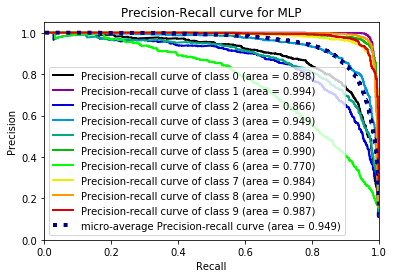

In [60]:
skplt.metrics.plot_precision_recall_curve(test_labels1, pred_proba, title ='Precision-Recall curve for MLP')
plt.show()

###### Visualisation of MLP weights

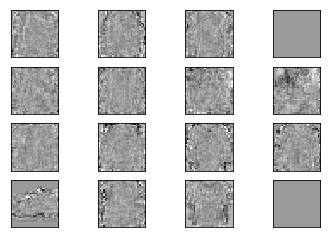

In [61]:
fig, axes = plt.subplots(4,4)

vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28,28), cmap = plt.cm.gray, vmin =.5 * vmin, vmax = .5* vmax)
    ax.set_xticks(())
    ax.set_yticks(())
    
plt.show()